In [27]:
import datetime

In [107]:
import os
import glob
import re
import mne
import pandas as pd

In [69]:
def to_seconds_list(list_tempo):
    return (list_tempo[0] * 3600 + list_tempo[1] * 60 +  list_tempo[2])

In [130]:
def to_seconds(datetime_time):
    return (datetime_time.hour * 3600 + datetime_time.minute * 60 +  datetime_time.second)

In [10]:
dict_intervalos = {
    "Patient1-evento_10_57.edf": ["10,57,36", "10,57,42"],
    "Patient1-16_29_2eventos.edf": ["16,29,02", "16,29,11"],
    "Patient1-00_08.edf": ["00,08,54", "00,09,02"],
    "Patient1-evento_4_53.edf": ["04,53,29", "04,53,38"],
    "Patient1-10_04_2eventos.edf": ["10,05,32", "10,05,39"],
    "Patient1-21_34.edf": ["21,34,21", "21,34,28"],
    "Patient1-19_47_2eventos.edf": ["17,26,03", "17,26,12"],
    "Patient1-evento_14_51.edf": ["14,11,55", "14,12,03"],
    "Patient1-22_27.edf": ["22,27,58", "22,28,06"],
    "Patient1-evento_18_09.edf": ["18,45,37", "18,45,43"],
    "Patient1-14_11_2eventos.edf": ["15,15,25", "15,15,33"],
    "Patient1-evento_16_28.edf": ["16,28,46", "16,28,52"],
    "Patient1-evento_13_26.edf": ["13,26,34", "13,26,41"],
    "Patient1-18_46.edf": ["22,01,17", "22,01,25"],
    "Patient1-evento_8_55.edf": ["18,08,49", "18,08,57"],
    "Patient1-evento_22_01.edf": ["08,55,48", "08,56,02"],
    "Patient1-evento.edf": ["13,13,37", "13,13,48"],
    "Patient2-inducao.edf": ["10,14,16", "10,16,20"],
    "Patient3-evento_9_00.edf": ["09,00,11", "09,00,52"],
    "Patient3-evento_prolongado.edf": ["05,28,02", "05,32,14"],
    "Patient3-evento_21_39.edf": ["21,39,04", "21,40,27"],
    "Patient3-evento_na_foto.edf": ["19,37,27", "19,38,35"],
    "Patient3-09_21_evento_com_dissociacao_pos.edf": ["09,21,06", "09,23,03"],
    "Patient3-evento_5_28.edf": ["05,28,51", "05,29,34"],
    "Patient3-evento.edf": ["12,01,44", "12,04,01"],
    "Patient4-01.edf": ["20,18,54", "20,21,00"],
    "Patient4-02.edf": ["20,32,02", "20,35,02"],
    "Patient4-03.edf": ["20,59,29", "21,01,58"],
    "Patient5-Evento_21_36_04_e_21_40_28.edf": [["21,40,28","21,35,58"], ["21,43,48","21,37,06"]],
    "Patient5-evento_08_56_52.edf": ["08,57,05", "08,58,37"],
    "Patient6-evento.edf": ["21,01,16", "21,01,49"],
    "Patient6-evento_durante_fei_1.edf": ["20,40,07", "20,40,17"],
    "Patient6-evento_durante_fei_2.edf": ["20,45,16", "20,46,13"],
    "Patient7-evento_19_39_26.edf": ["19,34,26", "19,35,51"],
    "Patient8_a-tremor.edf": ["03,36,18", "03,36,29"],
    "Patient8_b-evento.edf": ["10,47,19", "10,47,39"],
    "Patient8_b-tremor.edf": ["11,22,37", "11,23,00"],
    "Patient9-1_evento.edf": ["09,31,00", "09,31,16"],
    "Patient9-2_evento.edf": ["16,47,58", "16,48,35"],
    "Patient10_a-evento.edf": ["17,39,26", "17,43,35"],
    "Patient10_b-2_crises_seguidas.edf": [["19,46,19","19,48,05"], ["19,47,15","19,48,53"]],
    "Patient10_b-Crise_1_24.edf": ["01,25,26", "01,26,48"],
    "Patient10_b-Crise_01_20.edf": ["01,20,58", "01,22,33"],
    "Patient10_b-crises_2_seguidas_com_TC_bilat.edf": [["21,22,35","21,13,06"], ["21,23,50","21,14,20"]],
    "Patient11_a-CNEP.edf": ["22,43,48", "22,45,01"],
    "Patient11_b-Crise_22_43_51.edf": ["10,52,15", "10,58,12"],
    "Patient12-Crise_13_25_21.edf": ["13,25,25", "13,28,13"],
    "Patient12-CTCG_16_06_55.edf": ["16,07,51", "16,09,53"],
    "Patient12-Crise_08_43_03.edf": ["08,43,03", "08,45,24"],
    "Patient13-Crise_10_01.edf": ["10,01,14", "10,01,56"],
    "Patient13-Crise_07_20_diferente.edf": ["07,20,30", "07,21,07"],
    "Patient13-Crise_06_54.edf": ["06,54,41", "06,55,24"],
    "Patient13-Crise_06_38.edf": ["06,38,58", "06,39,27"],
    "Patient13-Crise_04_47.edf": ["04,47,34", "04,48,04"],
    "Patient13-Crise_02_07.edf": ["02,07,47", "02,08,07"],
    "Patient13-Crise_01_02.edf": ["01,03,07", "01,03,38"],
    "Patient13-Crise_23_35.edf": ["23,36,02", "23,36,55"],
    "Patient13-Crise_22_42.edf": ["22,42,09", "22,42,52"],
    "Patient13-Crise_09_39.edf": ["09,40,15", "09,40,30"],
    "Patient13-Crise_08_49.edf": ["08,49,26", "08,50,12"],
    "Patient13-Crise_07_10.edf": ["07,11,08", "07,11,31"],
    "Patient13-Crise_06_31.edf": ["06,31,21", "06,31,44"],
    "Patient13-Crise_04_45.edf": ["04,45,01", "04,45,46"],
    "Patient13-Crise_02_46.edf": ["02,45,17", "02,45,49"],
    "Patient13-Crise_8_236.edf": ["08,25,56", "08,26,09"],
    "Patient13-Crise_8_03.edf": ["08,03,19", "08,03,33"],
    "Patient13-Crise_7_13.edf": [["07,13,38","07,14,02"], ["07,13,46","07,14,15"]],
    "Patient13-Crise_6_50.edf": ["06,51,07", "06,51,49"],
    "Patient13-Crise_6_31.edf": ["06,31,15", "06,31,42"],
    "Patient13-Crise_5_23.edf": ["05,23,08", "05,23,32"],
    "Patient13-Crise_04_39.edf": ["04,39,10", "04,39,32"],
    "Patient13-Crise_04_53.edf": ["04,52,21", "04,53,10"],
    "Patient13-Crise_6_43.edf": ["06,43,51", "06,44,37"],
    "Patient13-Crise_7_14.edf": ["07,12,01", "07,13,15"],
    "Patient13-Crise_6_47.edf": ["06,46,43", "06,47,58"],
    "Patient13-Crise_1_34.edf": ["01,35,03", "01,36,29"],
    "Patient13-Crise_4_19.edf": ["04,20,00", "04,21,54"],
    "Patient14-CriseTD_6_34_17.edf": ["06,35,38", "06,37,36"],
    "Patient14-CriseTD_6_29_51.edf": ["06,35,26", "06,37,36"],
    "Patient15-crise_1.edf": [["14:14:13", "14:15:09", "14:15:20", "14:15:28", "14:15:49", "14:16:18"],["14:14:50", "14:15:12", "14:15:27", "14:15:34", "14:16:09", "14:16:43"]],
    "Patient15-cluster_de_crises_1_MDZ_22_42_CLB_22_44.edf": ["22,27,29", "22,32,50"],
    "Patient15-crise_2.edf": ["08,32,03", "08,32,54"],
    "Patient15-cluster_de_crise_2.edf": [["07:39:37", "07:40:47", "07:42:52"],["07:40:36", "07:42:34", "07:45:09"]],
    "Patient15-crise_3.edf": [["04:01:38", "04:03:27"],["04:02:20", "04:03:48"]],
    "Patient15-cluster_de_crise_3.edf": [["13:37:38", "13:45:25"],["13:38:17", "13:48:11"]],
    "Patient15-crise_4.edf": ["03,46,16", "03,46,37"],
    "Patient15-crise_5.edf": [["03:14:04", "03:15:51"],["03:14:53", "03:16:27"]],
    "Patient15-crise_6.edf": ["08,01,08", "08,01,54"],
    "Patient15-crise_7.edf": ["05,59,29", "06,01,08"],
    "Patient15-crise_8.edf": ["02,03,47", "02,03,57"],
    "Patient15-crise_9.edf": ["07,38,11", "07,38,47"],
    "Patient15-crise_10.edf": ["06,08,20", "06,08,59"],
    "Patient16-crise_desencadeada.edf": ["17,43,23", "17,44,33"],
    "Patient17-Crise_3_39_14__04_4_38__04_30_36__05_10_03.edf": ["04,03,57", "04,05,23"],
    "Patient17-+3_Crise_3_39_14__04_4_38__04_30_36__05_10_03.edf": ["03,38,12", "03,39,34"],
    "Patient17-05_47_21__06_08_56__06_45_08__08_10_41.edf": ["05,46,56", "05,47,52"],
    "Patient17-08_33_23__09_09_06__09_42_51.edf": ["08,32,54", "08,34,34"],
    "Patient17-+5_05_47_21__06_08_56__06_45_08__08_10_41.edf": ["06,08,56", "06,10,25"],
    "Patient17-+6_05_47_21__06_08_56__06_45_08__08_10_41.edf": ["08,10,08", "08,11,16"],
    "Patient17-+7_Crise_3_39_14__04_4_38__04_30_36__05_10_03.edf": ["04,30,02", "04,31,42"],
    "Patient17-+8_Crise_3_39_14__04_4_38__04_30_36__05_10_03.edf": ["05,09,32", "05,11,12"],
    "Patient17-+9_05_47_21__06_08_56__06_45_08__08_10_41.edf": ["06,45,09", "06,46,56"],
    "Patient17-Crise_21_35_33__23_20_28.edf": ["21,34,50", "21,36,05"],
    "Patient17-+4_08_33_23__09_09_06__09_42_51.edf": ["09,08,07", "09,09,24"],
    "Patient17-+1_Crise_21_35_33__23_20_28.edf": ["23,19,37", "23,20,40"],
    "Patient17-+2_08_33_23__09_09_06__09_42_51.edf": ["09,42,02", "09,43,20"],
    "Patient18-crise_11_16__e_periodo_pre_crise_com_pulseira.edf": ["11,16,54", "11,17,48"],
    "Patient18-crise_com_pulseira.edf": ["13,25,10", "13,26,00"],
    "Patient19-crise_10_56_16.edf": ["10,56,31", "10,57,39"],
    "Patient19-crise_23_55_15.edf": ["23,55,48", "23,56,40"],
    "Patient20-crise_temporal_esq.edf": ["14,06,51", "14,09,57"],
    "Patient21-crise_2_com_SPECT_ictal.edf": ["12,50,47", "12,52,17"],
    "Patient21-crise_01.edf": ["08,24,43", "08,25,25"],
    "Patient22-crise2.edf": ["22,20,41", "22,22,03"],
    "Patient22-crise3.edf": ["05,02,30", "05,03,47"],
    "Patient22-crise_eletroclinica_1_TE.edf": ["13,58,18", "14,00,02"],
    "Patient22-crise_eletrografica.edf": ["00,32,42", "00,33,54"],
    "Patient22-crise4.edf": ["10,27,38", "10,28,53"],
    "Patient23-crise.edf": ["08,28,40", "08,31,05"],
    "Patient24-crise_breve_ok.edf": ["03,31,16", "03,31,20"],
    "Patient24-19_57_crise.edf": ["19,57,47", "19,57,50"],
    "Patient24-crise_11_21_36.edf": ["11,21,24", "11,21,28"],
    "Patient25-crise_na__HV.edf": ["19,48,14", "19,48,34"],
    "Patient25-crise_na_HV.edf": ["19,49,47", "19,50,04"],
    "Patient25-crise_eletrografica_sono.edf": ["10,54,41", "10,54,53"],
    "Patient26-crise.edf": ["10,31,45", "10,32,11"],
    "Patient26-+10_crise.edf": ["11,56,58", "11,57,30"],
    "Patient26-+11_crise.edf": ["10,51,54", "10,52,23"],
    "Patient26-+12_crise.edf": ["15,29,26", "15,29,59"],
    "Patient26-+13_crise.edf": ["09,21,24", "09,21,50"],
    "Patient27-crise_20_24_17_e_20_52_02.edf": ["20,24,17", "20,24,35"],
    "Patient27-crise_15_59_24_e_18_03_15.edf": ["15,59,18", "16,01,34"],
    "Patient28-crise.edf": ["12,40,49", "12,42,28"],
    "Patient29-crise7.edf": ["05,11,25", "05,12,13"],
    "Patient29-crise5.edf": ["16,06,02", "16,06,13"],
    "Patient29-crise3.edf": ["14,03,46", "14,04,03"],
    "Patient29-crise1.edf": ["13,17,01", "13,17,52"],
    "Patient29-crise2.edf": ["13,46,54", "13,47,37"],
    "Patient29-crise6.edf": ["00,28,53", "00,29,33"],
    "Patient29-crise4.edf": ["15,01,11", "15,01,23"],
    "Patient30-Crise_23_42_41.edf": ["23,42,41", "23,43,10"],
    "Patient30-CRISE_16_10_28.edf": ["16,10,28", "16,10,45"],
    "Patient30-CRISE_08_05_35.edf": ["08,05,35", "08,06,17"],
    "Patient30-Crise_03_08_15.edf": ["03,08,15", "03,08,57"],
    "Patient30-CRISE_07_33_16.edf": ["07,33,11", "07,33,52"]   
}


In [ ]:
dict_intervalos_editado ={
    "Patient1-evento_10_57.edf":[[10,57,36],[10,57,42]],
    "Patient1-16_29_2eventos.edf":[[16,29,2],[16,29,11]],
    "Patient1-00_08.edf":[[00,8,54],[00,9,2]],
    "Patient1-evento_4_53.edf":[[4,53,29],[4,53,38]],
    "Patient1-10_04_2eventos.edf":[[10,5,32],[10,5,39]],
    "Patient1-21_34.edf":[[21,34,21],[21,34,28]],
    "Patient1-19_47_2eventos.edf":[[17,26,3],[17,26,12]],
    "Patient1-evento_14_51.edf":[[14,11,55],[14,12,3]],
    "Patient1-22_27.edf":[[22,27,58],[22,28,6]],
    "Patient1-evento_18_09.edf":[[18,45,37],[18,45,43]],
    "Patient1-14_11_2eventos.edf":[[15,15,25],[15,15,33]],
    "Patient1-evento_16_28.edf":[[16,28,46],[16,28,52]],
    "Patient1-evento_13_26.edf":[[13,26,34],[13,26,41]],
    "Patient1-18_46.edf":[[22,1,17],[22,1,25]],
    "Patient1-evento_8_55.edf":[[18,8,49],[18,8,57]],
    "Patient1-evento_22_01.edf":[[8,55,48],[8,56,2]],
    "Patient1-evento.edf":[[13,13,37],[13,13,48]],
    "Patient2-inducao.edf":[[10,14,16],[10,16,20]],
    "Patient3-evento_9_00.edf":[[9,00,11],[9,00,52]],
    "Patient3-evento_prolongado.edf":[[5,28,2],[5,32,14]],
    "Patient3-evento_21_39.edf":[[21,39,4],[21,40,27]],
    "Patient3-evento_na_foto.edf":[[19,37,27],[19,38,35]],
    "Patient3-09_21_evento_com_dissociacao_pos.edf":[[9,21,6],[9,23,3]],
    "Patient3-evento_5_28.edf":[[5,28,51],[5,29,34]],
    "Patient3-evento.edf":[[12,1,44],[12,4,1]],
    "Patient4-1.edf":[[20,18,54],[20,21,00]],
    "Patient4-2.edf":[[20,32,2],[20,35,2]],
    "Patient4-3.edf":[[20,59,29],[21,1,58]],
    "Patient5-Evento_21_36_04_e_21_40_28.edf":[[[21,40,28],[21,35,58]], [[21,43,48],[21,37,6]]],
    "Patient5-evento_08_56_52.edf":[[8,57,5],[8,58,37]],
    "Patient6-evento.edf":[[21,1,16],[21,1,49]],
    "Patient6-evento_durante_fei_1.edf":[[20,40,7],[20,40,17]],
    "Patient6-evento_durante_fei_2.edf":[[20,45,16],[20,46,13]],
    "Patient7-evento_19_39_26.edf":[[19,34,26],[19,35,51]],
    "Patient8_a-tremor.edf":[[3,36,18],[3,36,29]],
    "Patient8_b-evento.edf":[[10,47,19],[10,47,39]],
    "Patient8_b-tremor.edf":[[11,22,37],[11,23,00]],
    "Patient9-1_evento.edf":[[9,31,00],[9,31,16]],
    "Patient9-2_evento.edf":[[16,47,58],[16,48,35]],
    "Patient10_a-evento.edf":[[17,39,26],[17,43,35]],
    "Patient10_b-2_crises_seguidas.edf":[[[19,46,19],[19,48,5]], [[19,47,15],[19,48,53]]],
    "Patient10_b-Crise_1_24.edf":[[1,25,26],[1,26,48]],
    "Patient10_b-Crise_01_20.edf":[[1,20,58],[1,22,33]],
    "Patient10_b-crises_2_seguidas_com_TC_bilat.edf":[[[21,22,35],[21,13,6]], [[21,23,50],[21,14,20]]],
    "Patient11_a-CNEP.edf":[[22,43,48],[22,45,1]],
    "Patient11_b-Crise_22_43_51.edf":[[10,52,15],[10,58,12]],
    "Patient12-Crise_13_25_21.edf":[[13,25,25],[13,28,13]],
    "Patient12-CTCG_16_06_55.edf":[[16,7,51],[16,9,53]],
    "Patient12-Crise_08_43_03.edf":[[8,43,3],[8,45,24]],
    "Patient13-Crise_10_01.edf":[[10,1,14],[10,1,56]],
    "Patient13-Crise_07_20_diferente.edf":[[7,20,30],[7,21,7]],
    "Patient13-Crise_06_54.edf":[[6,54,41],[6,55,24]],
    "Patient13-Crise_06_38.edf":[[6,38,58],[6,39,27]],
    "Patient13-Crise_04_47.edf":[[4,47,34],[4,48,4]],
    "Patient13-Crise_02_07.edf":[[2,7,47],[2,8,7]],
    "Patient13-Crise_01_02.edf":[[1,3,7],[1,3,38]],
    "Patient13-Crise_23_35.edf":[[23,36,2],[23,36,55]],
    "Patient13-Crise_22_42.edf":[[22,42,9],[22,42,52]],
    "Patient13-Crise_09_39.edf":[[9,40,15],[9,40,30]],
    "Patient13-Crise_08_49.edf":[[8,49,26],[8,50,12]],
    "Patient13-Crise_07_10.edf":[[7,11,8],[7,11,31]],
    "Patient13-Crise_06_31.edf":[[6,31,21],[6,31,44]],
    "Patient13-Crise_04_45.edf":[[4,45,1],[4,45,46]],
    "Patient13-Crise_02_46.edf":[[2,45,17],[2,45,49]],
    "Patient13-Crise_8_236.edf":[[8,25,56],[8,26,9]],
    "Patient13-Crise_8_03.edf":[[8,3,19],[8,3,33]],
    "Patient13-Crise_7_13.edf":[[[7,13,38],[7,14,2]], [[7,13,46],[7,14,15]]],
    "Patient13-Crise_6_50.edf":[[6,51,7],[6,51,49]],
    "Patient13-Crise_6_31.edf":[[6,31,15],[6,31,42]],
    "Patient13-Crise_5_23.edf":[[5,23,8],[5,23,32]],
    "Patient13-Crise_04_39.edf":[[4,39,10],[4,39,32]],
    "Patient13-Crise_04_53.edf":[[4,52,21],[4,53,10]],
    "Patient13-Crise_6_43.edf":[[6,43,51],[6,44,37]],
    "Patient13-Crise_7_14.edf":[[7,12,1],[7,13,15]],
    "Patient13-Crise_6_47.edf":[[6,46,43],[6,47,58]],
    "Patient13-Crise_1_34.edf":[[1,35,3],[1,36,29]],
    "Patient13-Crise_4_19.edf":[[4,20,00],[4,21,54]],
    "Patient14-CriseTD_6_34_17.edf":[[6,35,38],[6,37,36]],
    "Patient14-CriseTD_6_29_51.edf":[[6,35,26],[6,37,36]],
    "Patient15-crise_1.edf":[[[14,14,13],[14,15,9],[14,15,20],[14,15,28],[14,15,49],[14,16,18]],[[14,14,50],[14,15,12],[14,15,27],[14,15,34],[14,16,9],[14,16,43]]],
    "Patient15-cluster_de_crises_1_MDZ_22_42_CLB_22_44.edf":[[22,27,29],[22,32,50]],
    "Patient15-crise_2.edf":[[8,32,3],[8,32,54]],
    "Patient15-cluster_de_crise_2.edf":[[[7,39,37],[7,40,47],[7,42,52]],[[7,40,36],[7,42,34],[7,45,9]]],
    "Patient15-crise_3.edf":[[[4,1,38],[4,3,27]],[[4,2,20],[4,3,48]]],
    "Patient15-cluster_de_crise_3.edf":[[[13,37,38],[13,45,25]],[[13,38,17],[13,48,11]]],
    "Patient15-crise_4.edf":[[3,46,16],[3,46,37]],
    "Patient15-crise_5.edf":[[[3,14,4],[3,15,51]],[[3,14,53],[3,16,27]]],
    "Patient15-crise_6.edf":[[8,1,8],[8,1,54]],
    "Patient15-crise_7.edf":[[5,59,29],[6,1,8]],
    "Patient15-crise_8.edf":[[2,3,47],[2,3,57]],
    "Patient15-crise_9.edf":[[7,38,11],[7,38,47]],
    "Patient15-crise_10.edf":[[6,8,20],[6,8,59]],
    "Patient16-crise_desencadeada.edf":[[17,43,23],[17,44,33]],
    "Patient17-Crise_3_39_14__04_4_38__04_30_36__05_10_03.edf":[[4,3,57],[4,5,23]],
    "Patient17-+3_Crise_3_39_14__04_4_38__04_30_36__05_10_03.edf":[[3,38,12],[3,39,34]],
    "Patient17-05_47_21__06_08_56__06_45_08__08_10_41.edf":[[5,46,56],[5,47,52]],
    "Patient17-08_33_23__09_09_06__09_42_51.edf":[[8,32,54],[8,34,34]],
    "Patient17-+5_05_47_21__06_08_56__06_45_08__08_10_41.edf":[[6,8,56],[6,10,25]],
    "Patient17-+6_05_47_21__06_08_56__06_45_08__08_10_41.edf":[[8,10,8],[8,11,16]],
    "Patient17-+7_Crise_3_39_14__04_4_38__04_30_36__05_10_03.edf":[[4,30,2],[4,31,42]],
    "Patient17-+8_Crise_3_39_14__04_4_38__04_30_36__05_10_03.edf":[[5,9,32],[5,11,12]],
    "Patient17-+9_05_47_21__06_08_56__06_45_08__08_10_41.edf":[[6,45,9],[6,46,56]],
    "Patient17-Crise_21_35_33__23_20_28.edf":[[21,34,50],[21,36,5]],
    "Patient17-+4_08_33_23__09_09_06__09_42_51.edf":[[9,8,7],[9,9,24]],
    "Patient17-+1_Crise_21_35_33__23_20_28.edf":[[23,19,37],[23,20,40]],
    "Patient17-+2_08_33_23__09_09_06__09_42_51.edf":[[9,42,2],[9,43,20]],
    "Patient18-crise_11_16__e_periodo_pre_crise_com_pulseira.edf":[[11,16,54],[11,17,48]],
    "Patient18-crise_com_pulseira.edf":[[13,25,10],[13,26,00]],
    "Patient19-crise_10_56_16.edf":[[10,56,31],[10,57,39]],
    "Patient19-crise_23_55_15.edf":[[23,55,48],[23,56,40]],
    "Patient20-crise_temporal_esq.edf":[[14,6,51],[14,9,57]],
    "Patient21-crise_2_com_SPECT_ictal.edf":[[12,50,47],[12,52,17]],
    "Patient21-crise_01.edf":[[8,24,43],[8,25,25]],
    "Patient22-crise2.edf":[[22,20,41],[22,22,3]],
    "Patient22-crise3.edf":[[5,2,30],[5,3,47]],
    "Patient22-crise_eletroclinica_1_TE.edf":[[13,58,18],[14,00,2]],
    "Patient22-crise_eletrografica.edf":[[00,32,42],[00,33,54]],
    "Patient22-crise4.edf":[[10,27,38],[10,28,53]],
    "Patient23-crise.edf":[[8,28,40],[8,31,5]],
    "Patient24-crise_breve_ok.edf":[[3,31,16],[3,31,20]],
    "Patient24-19_57_crise.edf":[[19,57,47],[19,57,50]],
    "Patient24-crise_11_21_36.edf":[[11,21,24],[11,21,28]],
    "Patient25-crise_na__HV.edf":[[19,48,14],[19,48,34]],
    "Patient25-crise_na_HV.edf":[[19,49,47],[19,50,4]],
    "Patient25-crise_eletrografica_sono.edf":[[10,54,41],[10,54,53]],
    "Patient26-crise.edf":[[10,31,45],[10,32,11]],
    "Patient26-+10_crise.edf":[[11,56,58],[11,57,30]],
    "Patient26-+11_crise.edf":[[10,51,54],[10,52,23]],
    "Patient26-+12_crise.edf":[[15,29,26],[15,29,59]],
    "Patient26-+13_crise.edf":[[9,21,24],[9,21,50]],
    "Patient27-crise_20_24_17_e_20_52_02.edf":[[20,24,17],[20,24,35]],
    "Patient27-crise_15_59_24_e_18_03_15.edf":[[15,59,18],[16,1,34]],
    "Patient28-crise.edf":[[12,40,49],[12,42,28]],
    "Patient29-crise7.edf":[[5,11,25],[5,12,13]],
    "Patient29-crise5.edf":[[16,6,2],[16,6,13]],
    "Patient29-crise3.edf":[[14,3,46],[14,4,3]],
    "Patient29-crise1.edf":[[13,17,1],[13,17,52]],
    "Patient29-crise2.edf":[[13,46,54],[13,47,37]],
    "Patient29-crise6.edf":[[00,28,53],[00,29,33]],
    "Patient29-crise4.edf":[[15,1,11],[15,1,23]],
    "Patient30-Crise_23_42_41.edf":[[23,42,41],[23,43,10]],
    "Patient30-CRISE_16_10_28.edf":[[16,10,28],[16,10,45]],
    "Patient30-CRISE_08_05_35.edf":[[8,5,35],[8,6,17]],
    "Patient30-Crise_03_08_15.edf":[[3,8,15],[3,8,57]],
    "Patient30-CRISE_07_33_16.edf":[[7,33,11],[7,33,52]]   
}


In [19]:
anodo_eeg_1 = ['EEG Fp1-Ref',  'EEG F3-Ref',  'EEG C3-Ref',  'EEG P3-Ref',  'EEG Fp1-Ref',  'EEG F7-Ref',  'EEG T7-Ref',  'EEG P7-Ref',  'EEG Fp2-Ref',
                           'EEG F4-Ref',  'EEG C4-Ref',  'EEG P4-Ref', 'EEG Fp2-Ref',  'EEG F8-Ref',  'EEG T8-Ref',  'EEG P8-Ref',  'EEG Fz-Ref',  'EEG Cz-Ref']

catodo_eeg_1 = ['EEG F3-Ref', 'EEG C3-Ref', 'EEG P3-Ref', 'EEG O1-Ref', 'EEG F7-Ref', 'EEG T7-Ref', 'EEG P7-Ref', 'EEG O1-Ref', 'EEG F4-Ref',
                'EEG C4-Ref', 'EEG P4-Ref', 'EEG O2-Ref', 'EEG F8-Ref', 'EEG T8-Ref', 'EEG P8-Ref', 'EEG O2-Ref', 'EEG Cz-Ref', 'EEG Pz-Ref']

channels_names_1 = ['Fp1-F3',
                    'F3-C3',
                    'C3-P3',
                    'P3-O1',
                    'Fp1-F7',
                    'F7-T7',
                    'T7-P7',
                    'P7-O1',
                    'Fp2-F4',
                    'F4-C4',
                    'C4-P4',
                    'P4-O2',
                    'Fp2-F8',
                    'F8-T8',
                    'T8-P8',
                    'P8-O2',
                    'Fz-Cz',
                    'Cz-Pz']

anodo_eeg_2 = ['EEG Fp1-Ref', 'EEG F3-Ref', 'EEG C3-Ref', 'EEG P3-Ref', 'EEG Fp1-Ref', 'EEG F7-Ref', 'EEG T3-Ref', 'EEG T5-Ref',
                           'EEG Fp2-Ref', 'EEG F4-Ref', 'EEG C4-Ref', 'EEG P4-Ref', 'EEG Fp2-Ref', 'EEG F8-Ref', 'EEG T4-Ref', 'EEG T6-Ref', 'EEG Fz-Ref', 'EEG Cz-Ref']

catodo_eeg_2 = ['EEG F3-Ref', 'EEG C3-Ref', 'EEG P3-Ref', 'EEG O1-Ref', 'EEG F7-Ref', 'EEG T3-Ref', 'EEG T5-Ref', 'EEG O1-Ref', 'EEG F4-Ref',
                'EEG C4-Ref', 'EEG P4-Ref', 'EEG O2-Ref', 'EEG F8-Ref', 'EEG T4-Ref', 'EEG T6-Ref', 'EEG O2-Ref', 'EEG Cz-Ref', 'EEG Pz-Ref']

channels_names_2 = ['Fp1-F3',
                    'F3-C3',
                    'C3-P3',
                    'P3-O1',
                    'Fp1-F7',
                    'F7-T3',
                    'T3-T5',
                    'T5-O1',
                    'Fp2-F4',
                    'F4-C4',
                    'C4-P4',
                    'P4-O2',
                    'Fp2-F8',
                    'F8-T4',
                    'T4-T6',
                    'T6-O2',
                    'Fz-Cz',
                    'Cz-Pz']


In [56]:
path = './study_data/Patient2-inducao.edf'
path_se = './study_data/Patient16-crise_desencadeada.edf'

In [134]:
raw_data = mne.io.read_raw_edf(path, preload=True, encoding='latin1').load_data()
raw_data_se_se = mne.io.read_raw_edf(path_se, preload=True, encoding='latin1').load_data()

Extracting EDF parameters from e:\GIT\Vitreus\docs\study_data\Patient2-inducao.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 119199  =      0.000 ...   595.995 secs...
Extracting EDF parameters from e:\GIT\Vitreus\docs\study_data\Patient16-crise_desencadeada.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 52799  =      0.000 ...   263.995 secs...


In [135]:
try:
    raw_bip_ref = mne.set_bipolar_reference(raw_data, anodo_eeg_1, catodo_eeg_1, channels_names_1, verbose=False)
    raw_bip_ref.pick_channels(channels_names_1, verbose=False)
except ValueError:
    raw_bip_ref = mne.set_bipolar_reference(raw_data, anodo_eeg_2, catodo_eeg_2, channels_names_2, verbose=False)
    raw_bip_ref.pick_channels(channels_names_2, verbose=False)

In [87]:
try:
    raw_bip_ref_se = mne.set_bipolar_reference(raw_data_se, anodo_eeg_1, catodo_eeg_1, channels_names_1, verbose=False)
    raw_bip_ref_se.pick_channels(channels_names_1, verbose=False)
except ValueError:
    raw_bip_ref_se = mne.set_bipolar_reference(raw_data_se, anodo_eeg_2, catodo_eeg_2, channels_names_2, verbose=False)
    raw_bip_ref_se.pick_channels(channels_names_2, verbose=False)

In [136]:
raw_bip_ref.info.get('meas_date').time()

datetime.time(10, 11, 10)

In [131]:
tempo_inicio_exame = to_seconds(raw_bip_ref.info.get('meas_date').time())
tempo_inicio_exame

36670

In [89]:
tempo_inicio_exame_se = to_seconds(raw_bip_ref_se.info.get('meas_date').time())

63737

In [102]:
data_se = raw_bip_ref_se.to_data_frame()
data_se.round(decimals=4)
data_se['time'] = data_se['time'] + tempo_inicio_exame_se
data_se.index = data_se.time
data_se = data_se.drop(['time'], axis=1)
data_se

,Fp1-F3,F3-C3,C3-P3,P3-O1,Fp1-F7,F7-T3,T3-T5,T5-O1,Fp2-F4,F4-C4,C4-P4,P4-O2,Fp2-F8,F8-T4,T4-T6,T6-O2,Fz-Cz,Cz-Pz
time,,,,,,,,,,,,,,,,,,
63737.000,11.230114,-6.640295,12.694705,23.438083,-35.449186,25.292832,42.968470,7.910491,-37.207645,-9.667186,5.273169,-10.937172,-14.550545,-29.589982,-9.570809,1.172500,1.660094,-9.863544
63737.005,14.550419,-5.175445,8.202518,33.008394,-41.699186,35.253766,27.929428,29.101878,-33.594366,-13.475779,2.148175,-5.761398,-20.312264,-35.254036,4.198718,0.684214,2.050718,-7.812764
63737.010,9.472300,0.488612,11.425172,27.539647,-30.468718,46.288909,31.640334,1.465205,-38.574832,-15.233591,2.148176,8.398754,-23.632575,-42.871219,21.679161,1.563140,4.785091,-7.910421
63737.015,12.304309,-5.468398,10.741577,18.848243,-33.007780,42.480315,26.073936,0.879262,-42.090455,-17.186715,5.077863,8.398753,-20.409918,-39.062630,2.929187,10.742807,1.464783,-12.402606
63737.020,12.792608,-0.780916,10.546266,9.570899,-42.773404,59.667814,1.952882,13.281566,-38.672488,-9.178906,4.101299,-2.245774,-13.964609,-37.695443,11.620574,-5.956391,7.617121,-10.644795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64000.975,-46.875267,36.426025,58.397807,112.891216,-103.808554,122.656080,-34.570517,176.562772,-668.945645,551.953658,15.722382,-72.167627,94.531489,-219.531350,-36.523858,-11.913513,-96.582011,80.175443
64000.980,-35.254167,43.261953,70.702488,86.426381,-90.527306,134.570137,-65.527508,186.621333,-616.015981,523.145077,25.390343,-48.925438,110.547103,-201.660262,-38.281677,12.988837,-97.265605,92.284807
64000.985,-56.347917,44.238519,62.499366,92.969347,-117.871053,156.054501,-93.945448,199.121314,-676.074548,555.859906,27.441124,-35.839504,85.156490,-216.308690,-33.008228,35.547407,-95.996075,91.698870


In [103]:
data = raw_bip_ref.to_data_frame()
data.round(decimals=4)
data['time'] = data['time'] + tempo_inicio_exame
data.index = data.time
data = data.drop(['time'], axis=1)
data

,Fp1-F3,F3-C3,C3-P3,P3-O1,Fp1-F7,F7-T3,T3-T5,T5-O1,Fp2-F4,F4-C4,C4-P4,P4-O2,Fp2-F8,F8-T4,T4-T6,T6-O2,Fz-Cz,Cz-Pz
time,,,,,,,,,,,,,,,,,,
36670.000,249.902360,62.988039,47.851979,20.312325,319.140541,23.339683,50.000162,-11.425682,254.397917,84.863170,31.542816,65.039492,263.089149,101.562556,41.894469,29.297222,96.294183,65.427938
36670.005,241.992206,60.839601,45.117606,14.257640,318.163979,19.628741,36.816574,-12.402242,241.214345,79.199111,30.956879,123.633237,258.987607,102.050836,20.703072,93.262057,96.684810,78.025583
36670.010,245.605486,63.769286,44.141045,7.421707,320.312416,19.140462,36.132979,-14.648333,242.093241,83.300676,35.937342,100.781676,258.694628,112.500052,24.316351,66.601905,102.055895,33.299062
36670.015,250.683610,63.671631,49.316823,8.398269,323.339759,20.800619,46.386882,-18.456928,246.780737,83.300674,37.402184,54.101995,261.526655,114.062551,26.953067,19.043317,108.501192,43.259991
36670.020,234.765644,64.159915,48.340260,1.757648,319.238198,2.441254,52.246249,-24.902235,232.620598,86.816297,34.179532,100.879334,249.612609,127.148484,6.445264,71.289403,95.708243,82.420109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37265.975,-54.101486,-5.468985,11.035594,-10.058752,-71.875014,3.906117,26.074363,-16.699095,-68.648426,-13.964916,4.980344,-85.448816,-58.004062,-13.085851,-3.027366,-88.964535,-26.459419,6.248311
37265.980,-50.878831,-0.390862,-0.097211,-3.808755,-76.074233,14.941272,13.476710,-7.519409,-68.550779,-7.128979,5.175656,-9.569915,-51.461104,-20.996005,7.421849,-15.038757,-19.623497,2.537376
37265.985,-60.253829,6.445072,-3.515177,-8.789221,-72.656264,-13.183711,32.617318,-12.890499,-103.414016,-6.445383,1.269410,66.504293,-80.855593,-23.339754,-6.250016,68.359667,-21.869585,-3.029025


In [124]:
inicio_evento,final_evento = dict_intervalos_editado['Patient2-inducao.edf']
inicio_evento_seconds = to_seconds_list(inicio_evento)
final_evento_seconds = to_seconds_list(final_evento)
inicio_evento_seconds,final_evento_seconds

(36856, 36980)

In [99]:
inicio_evento_se,final_evento_se = dict_intervalos_editado['Patient16-crise_desencadeada.edf']
inicio_evento_seconds_se = to_seconds_list(inicio_evento_se)
final_evento_seconds_se = to_seconds_list(final_evento_se)
inicio_evento_se,final_evento_se
inicio_evento_seconds_se,final_evento_seconds_se

(63803, 63873)

In [127]:
str(datetime.timedelta(seconds=36856))

'10:14:16'

In [123]:
data['tempo_formatada']= data.apply(lambda x : str(datetime.timedelta(seconds=x['tempo_formatado'])),axis=1)
data

,Fp1-F3,F3-C3,C3-P3,P3-O1,Fp1-F7,F7-T3,T3-T5,T5-O1,Fp2-F4,F4-C4,C4-P4,P4-O2,Fp2-F8,F8-T4,T4-T6,T6-O2,Fz-Cz,Cz-Pz,tempo_formatado,tempo_formatada
time,,,,,,,,,,,,,,,,,,,,
36670.000,249.902360,62.988039,47.851979,20.312325,319.140541,23.339683,50.000162,-11.425682,254.397917,84.863170,31.542816,65.039492,263.089149,101.562556,41.894469,29.297222,96.294183,65.427938,36670.000,10:11:10
36670.005,241.992206,60.839601,45.117606,14.257640,318.163979,19.628741,36.816574,-12.402242,241.214345,79.199111,30.956879,123.633237,258.987607,102.050836,20.703072,93.262057,96.684810,78.025583,36670.005,10:11:10.005000
36670.010,245.605486,63.769286,44.141045,7.421707,320.312416,19.140462,36.132979,-14.648333,242.093241,83.300676,35.937342,100.781676,258.694628,112.500052,24.316351,66.601905,102.055895,33.299062,36670.010,10:11:10.010000
36670.015,250.683610,63.671631,49.316823,8.398269,323.339759,20.800619,46.386882,-18.456928,246.780737,83.300674,37.402184,54.101995,261.526655,114.062551,26.953067,19.043317,108.501192,43.259991,36670.015,10:11:10.015000
36670.020,234.765644,64.159915,48.340260,1.757648,319.238198,2.441254,52.246249,-24.902235,232.620598,86.816297,34.179532,100.879334,249.612609,127.148484,6.445264,71.289403,95.708243,82.420109,36670.020,10:11:10.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37265.975,-54.101486,-5.468985,11.035594,-10.058752,-71.875014,3.906117,26.074363,-16.699095,-68.648426,-13.964916,4.980344,-85.448816,-58.004062,-13.085851,-3.027366,-88.964535,-26.459419,6.248311,37265.975,10:21:05.975000
37265.980,-50.878831,-0.390862,-0.097211,-3.808755,-76.074233,14.941272,13.476710,-7.519409,-68.550779,-7.128979,5.175656,-9.569915,-51.461104,-20.996005,7.421849,-15.038757,-19.623497,2.537376,37265.980,10:21:05.980000
37265.985,-60.253829,6.445072,-3.515177,-8.789221,-72.656264,-13.183711,32.617318,-12.890499,-103.414016,-6.445383,1.269410,66.504293,-80.855593,-23.339754,-6.250016,68.359667,-21.869585,-3.029025,37265.985,10:21:05.985000


In [117]:
str(datetime.timedelta(seconds=666))

'10:11:10'

<AxesSubplot: xlabel='time'>

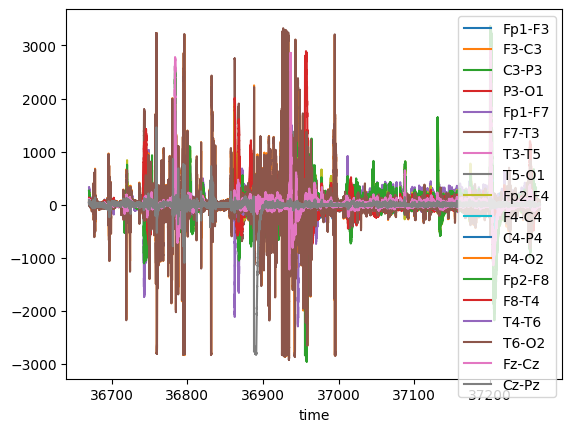

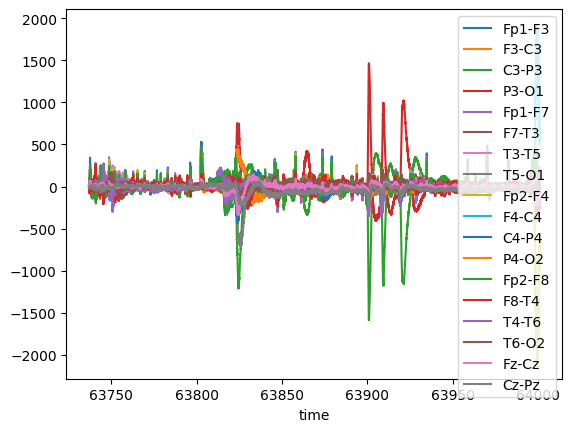

In [142]:
data.drop(columns=['tempo_formatado']).plot()
data_se.plot()

In [153]:
lista = [[[7,13,38],[7,14,2]], [[7,13,46],[7,14,15]]]

<AxesSubplot: xlabel='time'>

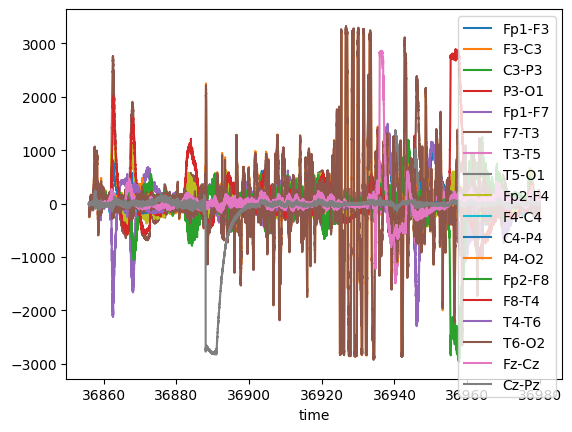

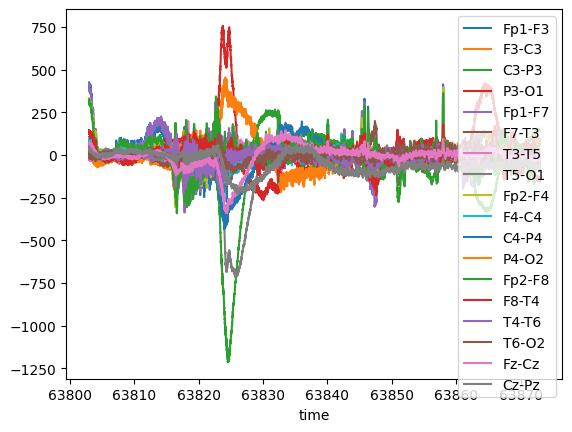

In [ ]:

data[[7,13,38],[7,14,2]:final_evento_seconds].plot()
data_se[inicio_evento_seconds_se:final_evento_seconds_se].plot()

In [184]:
inicio_evento,final_evento = dict_intervalos_editado['Patient1-19_47_2eventos.edf']

In [186]:
inicio_evento_seconds = to_seconds_list(inicio_evento)
final_evento_seconds = to_seconds_list(final_evento)
inicio_evento_seconds,final_evento_seconds

(62763, 62772)

In [164]:
path = './study_data/Patient1-19_47_2eventos.edf'

In [ ]:
raw_data = mne.io.read_raw_edf(path, preload=True, encoding='latin1').load_data()

Extracting EDF parameters from e:\GIT\Vitreus\docs\study_data\Patient1-19_47_2eventos.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 60599  =      0.000 ...   302.995 secs...


In [166]:
try:
    raw_bip_ref = mne.set_bipolar_reference(raw_data, anodo_eeg_1, catodo_eeg_1, channels_names_1, verbose=False)
    raw_bip_ref.pick_channels(channels_names_1, verbose=False)
except ValueError:
    raw_bip_ref = mne.set_bipolar_reference(raw_data, anodo_eeg_2, catodo_eeg_2, channels_names_2, verbose=False)
    raw_bip_ref.pick_channels(channels_names_2, verbose=False)

In [173]:
tempo_inicio_exame = to_seconds(raw_bip_ref.info.get('meas_date').time())


In [189]:
data = raw_bip_ref.to_data_frame()
data.round(decimals=4)
data['time'] = data['time'] + tempo_inicio_exame
data.index = data.time
data = data.drop(['time'], axis=1)
data[inicio_evento_seconds:final_evento_seconds]

,Fp1-F3,F3-C3,C3-P3,P3-O1,Fp1-F7,F7-T7,T7-P7,P7-O1,Fp2-F4,F4-C4,C4-P4,P4-O2,Fp2-F8,F8-T8,T8-P8,P8-O2,Fz-Cz,Cz-Pz
time,,,,,,,,,,,,,,,,,,
62763.000,4.686771,-2.537127,-12.792961,1.757336,13.182404,-16.209009,17.671276,-23.530651,4.492154,54.881376,-13.670301,10.058487,36.523698,-33.984620,28.613369,24.609268,6.254196,-11.720975
62763.005,19.042229,23.146474,-8.789055,8.983906,62.205805,-33.591783,40.913373,-27.143842,9.570279,-31.251390,18.165592,81.933485,42.285413,-23.926023,18.750087,41.308488,8.109726,-6.447567
62763.010,-1.953860,-14.548818,-14.746086,1.464372,0.096464,-25.291011,25.874342,-30.464185,-7.421908,-8.009216,10.353104,55.956924,29.980727,-34.277586,16.015713,39.160050,1.859717,-16.310834
62763.015,-3.516351,-13.572277,-17.871085,5.956554,0.487097,-15.525412,15.132210,-29.097053,-23.535190,58.982935,-20.213266,-0.781356,23.730729,-49.609618,9.082121,31.249892,0.687789,-22.267838
62763.020,16.307855,6.251946,-11.035149,3.026872,7.908968,-0.486350,39.936837,-32.807931,0.878873,-10.450623,1.857012,49.316299,24.511978,-24.023681,5.859463,35.253799,4.984712,-12.697555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62771.980,1413.474735,-129.489179,437.011657,-286.718905,958.103508,394.924801,5.852136,75.397864,-225.000011,-3348.827822,2063.281079,1820.410027,-186.132692,801.855338,-1615.722552,1309.863180,383.893531,1071.773028
62771.985,1466.013767,-147.555572,437.499938,-269.238436,957.419922,471.584932,-22.956478,80.671322,-269.531260,-3349.316103,2060.449049,1839.160027,-184.960821,780.663936,-1653.710832,1338.769429,381.354481,1065.913653
62771.990,1489.841883,-131.149332,429.296815,-265.527499,960.154302,476.174752,4.484932,81.647881,-215.332043,-3300.585631,2075.683419,1843.554559,-97.265508,762.695185,-1614.550677,1352.441304,395.807564,1078.413652


In [180]:
str(datetime.timedelta(seconds=63048.995))

'17:30:48.995000'

In [211]:
data = data.round(4)
exame_pnes = exame_pnes.round(4)

In [190]:
exame_pnes = pd.read_excel('./study_data/Patient1-19_47_2eventos.xlsx')
exame_pnes.index = exame_pnes.time


,Fp1-F3,F3-C3,C3-P3,P3-O1,Fp1-F7,F7-T7,T7-P7,P7-O1,Fp2-F4,F4-C4,C4-P4,P4-O2,Fp2-F8,F8-T8,T8-P8,P8-O2,Fz-Cz,Cz-Pz
time,,,,,,,,,,,,,,,,,,
62763.000,False,True,True,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True
62763.005,True,False,True,True,True,False,False,True,True,True,False,True,True,True,False,True,True,True
62763.010,True,False,False,False,True,False,False,False,True,True,True,False,False,True,True,True,False,True
62763.015,False,False,False,True,True,True,False,False,True,True,False,True,False,False,True,True,True,False
62763.020,True,True,False,False,True,True,True,False,True,False,True,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62771.980,True,False,True,True,True,True,False,True,True,False,True,False,False,True,False,False,True,False
62771.985,False,True,False,False,True,True,True,True,True,False,False,False,False,True,False,False,True,True
62771.990,False,False,False,True,True,False,True,True,True,True,False,True,True,True,False,False,True,True


In [217]:
exame_pnes.drop(columns='time')[inicio_evento_seconds:final_evento_seconds].equals(data[inicio_evento_seconds:final_evento_seconds])

True